<a href="https://colab.research.google.com/github/rijhkllll/FIrstOne4/blob/master/Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pathlib
import pandas as pd
import numpy as np
from os import listdir
from os.path import join
import os
import random
import cv2
class Process:
    def __init__(self, data_directory,image_height,image_width):
        self.directory = data_directory
        self.height= image_height
        self.width= image_width
        
    def ImageProcess(self):
        all_image = []
        size = self.height,self.width
        
        data_root = pathlib.Path(self.directory)
        folders = os.listdir(data_root)
        
        all_image_paths = list(data_root.glob('*/*'))
        all_image_paths = [str(path) for path in all_image_paths]
        random.shuffle(all_image_paths)
        
        for path in all_image_paths:
            img = cv2.imread(path)
            #im = cv2.resize(img, None, fx=0.5, fy=0.5)   
            im = cv2.resize(img,size)
            im =im/ 255.0
            all_image.append(im)
        
        all_image=np.asarray(all_image)
            
        label_to_index = dict((name, index) for index,name in enumerate(folders))
        index_to_label= dict((index,name) for index,name in enumerate(folders))
        all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_image_paths]
        all_image_labels=np.asarray(all_image_labels)

        return all_image,all_image_labels,index_to_label


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:

from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import pathlib
import random
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from os import listdir
from os.path import join
import cv2
import pandas
import os
import datetime
from keras import utils as np_utils
from keras.preprocessing.image import ImageDataGenerator




class ShowData:
    def __init__(self, train_images,train_label,test_images,test_lebel,index_to_label):
        self.train_images = train_images
        self.train_label= train_label
        self.test_images= test_images
        self.test_lebel=test_lebel
        self.index_to_label=index_to_label
        
    def checkTrainData(self):
        plt.figure(figsize=(20,20))
        for i in range(5):
            plt.subplot(5,5,i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(self.train_images[i], cmap=plt.cm.binary)
            plt.xlabel(self.index_to_label[self.train_label[i]])
        plt.show()
        
    def TestingData(self,predictions,index_to_label):
        plt.figure(figsize=(10,10))
        for i in range(25):
            plt.subplot(5,5,i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(self.test_images[i], cmap=plt.cm.binary)
            plt.xlabel(index_to_label[np.argmax(predictions[i])])
            plt.ylabel(index_to_label[self.test_lebel[i]])
        plt.show()


Using TensorFlow backend.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
#from Preprocess import Process
#from TestData import ShowData
import tensorflow as tf
import pathlib
import random
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from os import listdir
from os.path import join
import cv2
import pandas
import os
import datetime
from keras import utils as np_utils
from keras.preprocessing.image import ImageDataGenerator

In [0]:
#process= Process(path,height,width)
!ls "drive/My Drive/flowers/data/flower_photos/daisy"

In [0]:
#img = cv2.imread("drive/My Drive/flowers/data/flower_photos/daisy/3456403987_5bd5fa6ece_n.jpg")
#im = cv2.resize(img,(224,224))

In [0]:
all_image = []
size = 224,224

data_root = pathlib.Path("drive/My Drive/flowers/data/flower_photos/flowers")
folders = os.listdir(data_root)

all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

for path in all_image_paths:
    all_image.append(path)

In [0]:
all_image1 = []
for i in all_image:
  if (len(i)>0):
    img = cv2.imread(path)
    #im = cv2.resize(img, None, fx=0.5, fy=0.5)   
    im = cv2.resize(img,(224,224))
    #print(im)
    im =im/ 255.0
    all_image1.append(im)

all_image1=np.asarray(all_image1)
    
label_to_index = dict((name, index) for index,name in enumerate(folders))
index_to_label= dict((index,name) for index,name in enumerate(folders))
all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_image_paths]
all_image_labels=np.asarray(all_image_labels)


In [0]:
# path="drive/My Drive/flowers/data/flower_photos"
# checkpoint_path = "training_3/cp.ckpt"
# height=224
# width=224
# base_learning_rate=0.0001

In [0]:
train_images= all_image1[:3000]
train_label= all_image_labels[:3000]
test_images= all_image1[3000:3300]
test_lebel=all_image_labels[3000:3300]
val_images= all_image1[3300:]
val_label=all_image_labels[3300:]
# from sklearn.model_selection import train_test_split
# train_images,train_label,test_images, test_label = train_test_split(images, labels, test_size=0.01,random_state=10)

In [7]:
print("train_shape: {}, Train_labels: {},test_image_shape: {}, test_labels: {},validation_image_shape: {}, validation_labels: {}".format(train_images.shape,train_label.shape,test_images.shape, test_lebel.shape,val_images.shape,val_label.shape ))

train_shape: (3000, 224, 224, 3), Train_labels: (3000,),test_image_shape: (300, 224, 224, 3), test_labels: (300,),validation_image_shape: (1026, 224, 224, 3), validation_labels: (1026,)


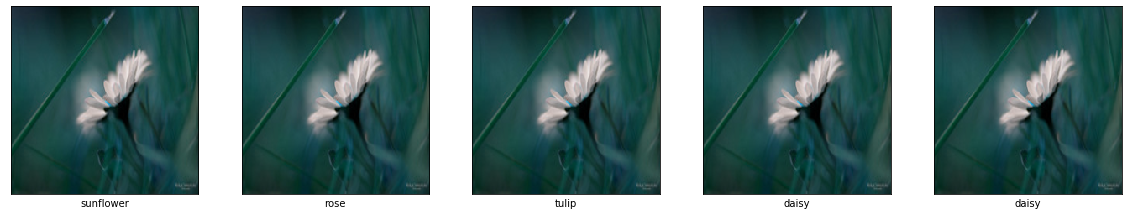

In [9]:
showData=ShowData(train_images,train_label,test_images,test_lebel,index_to_label)
showData.checkTrainData()

In [8]:
VGG=tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False)
VGG.trainable=False

model = tf.keras.Sequential([
  VGG,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 14,780,997
Trainable params: 66,309
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

#checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
#cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                             #    save_weights_only=True,
                                              #   verbose=1)

In [0]:
batch_size=8
epochs=300


In [0]:
datagen.fit(train_images)
history=model.fit_generator(datagen.flow(train_images, train_label, batch_size=batch_size),
                    steps_per_epoch=len(train_images) / batch_size, epochs=epochs,
                    validation_data=(val_images, val_label))

Epoch 1/300
375/375 [==============================] - 43s 114ms/step - loss: 1.6343 - acc: 0.2237 - val_loss: 1.6176 - val_acc: 0.2212
Epoch 2/300
375/375 [==============================] - 38s 101ms/step - loss: 1.6157 - acc: 0.2293 - val_loss: 1.6132 - val_acc: 0.2212
Epoch 3/300
375/375 [==============================] - 38s 100ms/step - loss: 1.6151 - acc: 0.2217 - val_loss: 1.6257 - val_acc: 0.2212
Epoch 4/300
375/375 [==============================] - 37s 99ms/step - loss: 1.6173 - acc: 0.2320 - val_loss: 1.6066 - val_acc: 0.2281
Epoch 5/300
375/375 [==============================] - 36s 96ms/step - loss: 1.6086 - acc: 0.2350 - val_loss: 1.6089 - val_acc: 0.2281
Epoch 6/300
375/375 [==============================] - 37s 99ms/step - loss: 1.6058 - acc: 0.2423 - val_loss: 1.6058 - val_acc: 0.2212
Epoch 7/300
375/375 [==============================] - 37s 98ms/step - loss: 1.6037 - acc: 0.2400 - val_loss: 1.6152 - val_acc: 0.2212
Epoch 8/300
375/375 [==============================]

In [0]:
loss,accuracy=model.evaluate(test_images, test_lebel)
print("Accuracy: {}, Loss: {}".format((accuracy*100),loss ))
predictions = model.predict(test_images)

30/30 [==============================] - 0s 3ms/sample - loss: 1.5914 - acc: 0.2667
Accuracy: 26.66666805744171, Loss: 1.5913817882537842


In [0]:
TestingData(predictions,indexToLabel)

In [0]:
def TestingData(predictions,index_to_label):
        plt.figure(figsize=(10,10))
        for i in range(25):
            plt.subplot(5,5,i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(test_images[i], cmap=plt.cm.binary)
            plt.xlabel(index_to_label[np.argmax(predictions[i])])
            plt.ylabel(index_to_label[test_lebel[i]])
        plt.show()

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

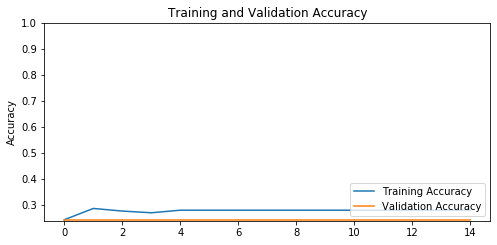

In [0]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

In [0]:

modele="model.h5"

In [0]:

model.save(modele)

In [0]:

model.load_weights(checkpoint_path)

In [0]:
loss,accuracy=model.evaluate(test_images, test_lebel)
print("Accuracy: {}, Loss: {}".format((accuracy*100),loss ))
predictions = model.predict(test_images)

30/30 [==============================] - 0s 3ms/sample - loss: 1.6300 - acc: 0.2000
Accuracy: 20.000000298023224, Loss: 1.6299960613250732


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
